<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_Extra_2_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 02: Exercícios Extras (Gabarito)





---
**Exercício 1:** Uma equação quadrática do tipo $f(x) = ax^2 + bx +c$ pode ter duas raízes reais ($b^2>4ac$), duas raízes imaginárias ($b^2<4ac$) ou apenas uma raiz. Escreva uma função `meu_bhaskara(a,b,c)` que devolve o número de raízes (`n_raizes`) e o valor das raízes (`r`). A variável `r` deve ser um array e a variável `n_raizes` admite valores $2$, $1$, $-2$ para duas raízes reais, uma raiz real e duas raízes complexas, respectivamente.

---




In [ ]:
import numpy as np

def meu_bhaskara(a,b,c):
    delta = b**2-4*a*c
    r = [0,0]
    if delta>0:
        r[0] = (-b-np.sqrt(delta))/(2*a)
        r[1] = (-b+np.sqrt(delta))/(2*a)
        n_raizes = 2
    elif delta<0:
        r[0] = complex(-b/(2*a),-np.sqrt(-delta)/(2*a))
        r[1] = complex(-b/(2*a),np.sqrt(-delta)/(2*a))
        n_raizes = -2
    else:
        r = -b/(2*a)
        n_raizes = 1
    return n_raizes, r

# Teste caso 1
n_raizes, r = meu_bhaskara(1,0,-9)
print(f'n = {n_raizes}, r = {r}')

# Teste caso 2
n_raizes, r = meu_bhaskara(3,4,5)
print(f'n = {n_raizes}, r = {r}')

# Teste caso 3
n_raizes, r = meu_bhaskara(2,4,2)
print(f'n = {n_raizes}, r = {r}')


n = 2, r = [-3.0, 3.0]
n = -2, r = [(-0.6666666666666666-1.1055415967851332j), (-0.6666666666666666+1.1055415967851332j)]
n = 1, r = -1.0




---
**Exercício 2:** Seja $A$ uma matriz $m\times p$ e $B$ uma matriz $p\times n$. O produto matricial, $M = A\times B$, é definido como: $$M_{i,j} = \sum_{k=1}^p A_{i,k} B_{k,j} $$
Escreva uma função `matrix_mult(A,B)` que utilize `for-loops` para calcular a matriz $M$. Você vai precisar de até $3$ loops aninhados. Não utilize a função `np.dot`

---






In [ ]:
import numpy as np

def matrix_mult(A,B):
    m = A.shape[0]
    p = A.shape[1]
    n = B.shape[1]
    M = np.zeros((m,n))

    for i in range(m):
        for j in range(n):
            soma = 0
            for k in range(p):
                soma += A[i,k]*B[k,j]
            M[i,j]= soma
    return M

# Teste caso 1
A = np.ones((3,3))
M = matrix_mult(A,A)
print(f'M = {M}')

# Teste caso 2
A = np.array([[1,2,3,4],[5,6,7,8]])
B = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
M = matrix_mult(A,B)
print(f'M = {M}')


M = [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]
M = [[30. 30. 30.]
 [70. 70. 70.]]




---
**Exercício 3:** O juros anual $i$ sobre um capital inicial $P_0$ é um pagamento por você permitir que o banco use o seu dinheiro. Os juros compostos são acumulados de acordo com a seguinte fórmula $P_n = (1+i)P_{n-1}$, onde $n$ é o número de anos. Escreva uma função `minha_caixinha(P0, i, meta)` onde a saída é o número de anos que vai levar para $P_0$ alcançar o valor da meta.

---




In [ ]:
import numpy as np

def minha_caixinha(P0,i,meta):
    n = 0
    Pnew = P0
    while Pnew < meta:
        Pold = Pnew
        Pnew = (1+i)*Pold
        n += 1
    return n

# Teste caso 1
n = minha_caixinha(1000,0.05,2000)
print(f'Necessário {n} anos para atingir a meta')

# Teste caso 2
n = minha_caixinha(1000,0.07,2000)
print(f'Necessário {n} anos para atingir a meta')

# Teste caso 3
n = minha_caixinha(500,0.07,2000)
print(f'Necessário {n} anos para atingir a meta')

Necessário 15 anos para atingir a meta
Necessário 11 anos para atingir a meta
Necessário 21 anos para atingir a meta




---
**Exercício 4:** Escreva uma função `poli_plot(n,x)` que faça o gráfico de polinômios $p_k(x)=x^k$ para valores de $k=1,2,3,…, n$ para um array de valores $x$.

---




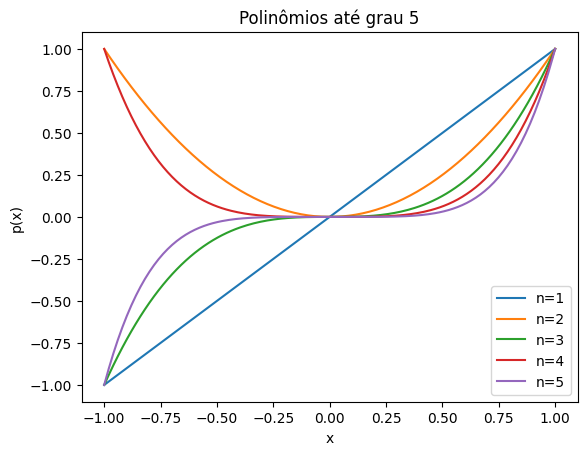

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def poli_plot(n,x):
    legenda = []
    for i in range(1,n+1):
        plt.plot(x,x**i)
        legenda.append(f'n={i}')

    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.title(f'Polinômios até grau {n}')
    plt.legend(legenda)
    plt.show()
    return

# Teste caso 1
poli_plot(5,np.linspace(-1,1,200))



---
**Exercício 5:** Considere a seguinte função:
$$ y(x) = \sqrt{\frac{100(1-0.01x^2)^2+0.02x^2}{(1-x^2)^2+0.1x^2}}$$
Crie uma figura com $4$ subplots de $y(x)$ no intervalo $0\leq x \leq 100$, usando as funções `plot`, `semilogx`, `semilogy` e `loglog`. Não se esqueça de colocar nomes nos eixos, título no gráfico e exibir as linhas de grid. Use o número de pontos necessário para tornar as curvas suaves.

---




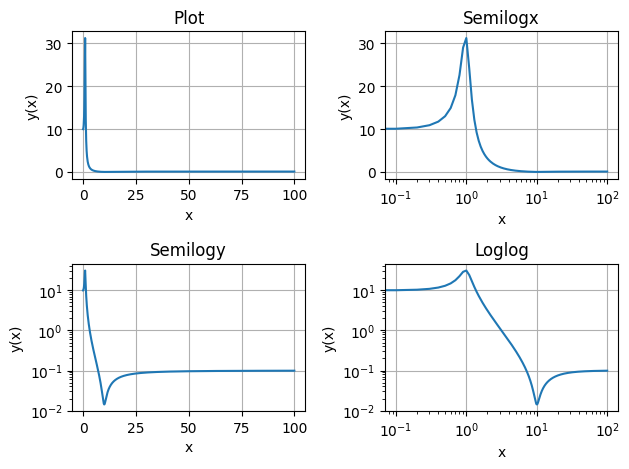

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,100,1000)
y = np.sqrt((100*(1-0.01*x**2)**2+0.02*x**2)/((1-x**2)**2+0.1*x**2))

plt.figure()

plt.subplot(2,2,1)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Plot")
plt.grid()

plt.subplot(2,2,2)
plt.semilogx(x,y)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Semilogx")
plt.grid()

plt.subplot(2,2,3)
plt.semilogy(x,y)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Semilogy")
plt.grid()

plt.subplot(2,2,4)
plt.loglog(x,y)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Loglog")
plt.grid()

plt.tight_layout()
plt.show()



---
**Exercício 6:** Considere a função a seguir no domínio $-4 \leq x \leq 4$ e $-3 \leq y \leq 3$:

$$ z(x,y) = \frac{xy(x^2-y^2)}{x^2+y^2}$$

Crie uma figura com $2$ subplots onde o primeiro seja $z(x,y)$ com a função `plot_surface` e o segundo com a função `plot_wireframe`. Não esqueça dos nomes nos eixos e título.

---




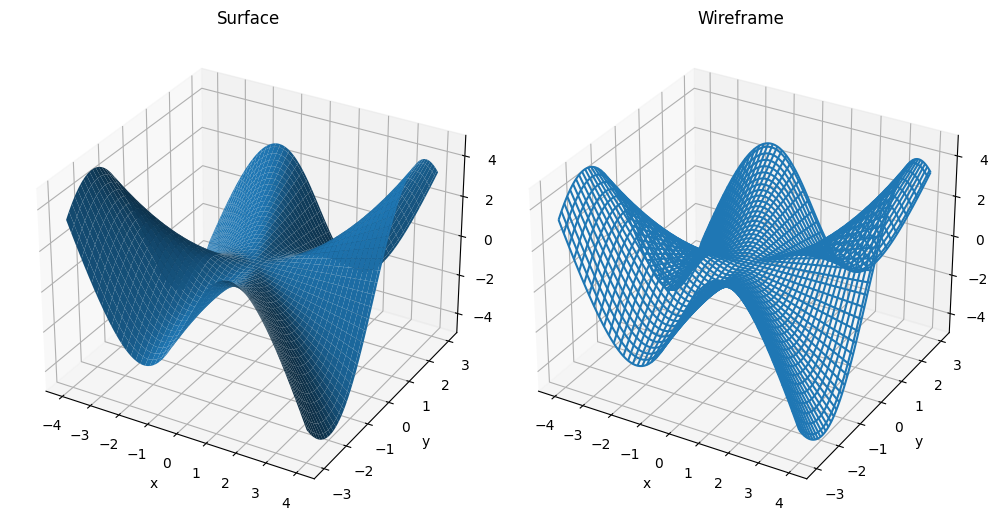

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4,4,100)
y = np.linspace(-3,3,100)

X,Y = np.meshgrid(x,y)

Z = X*Y*(X**2-Y**2)/(X**2+Y**2)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,2,1, projection="3d")
ax.plot_surface(X,Y,Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z(x,y)")
ax.set_title("Surface")

ax = fig.add_subplot(1,2,2, projection="3d")
ax.plot_wireframe(X,Y,Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z(x,y)")
ax.set_title("Wireframe")

plt.tight_layout()
plt.show()
